In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

# 운영 체제 확인
if platform.system() == 'Darwin':  # Mac
    print('apple gothic')
    font_name = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    font_name = 'NanumGothic'
else:
    font_name = None

# 한글 폰트 설정
if font_name:
    plt.rcParams['font.family'] = font_name

# 마이너스 부호 설정
plt.rcParams['axes.unicode_minus'] = False

apple gothic


## 꺽은 선 그래프

In [67]:
df = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col = '국가')
df = df.loc[['미국', '스페인', '이탈리아', '독일', '프랑스']]
df = df.T
df

국가,미국,스페인,이탈리아,독일,프랑스
4월06일,335524,130709,128948,100024,70478
4월07일,364723,135032,132547,102453,74390
4월08일,387547,140510,135586,107591,78167
4월09일,424945,146690,139422,112113,82048
4월10일,461437,152446,143626,118181,86334
4월11일,495535,157022,147577,122171,90276
4월12일,524903,161852,152271,124908,93790


In [68]:
# 누적 감염자 수
df = df.cumsum(axis = 0)

Text(0, 0.5, '감염 수(10만)')

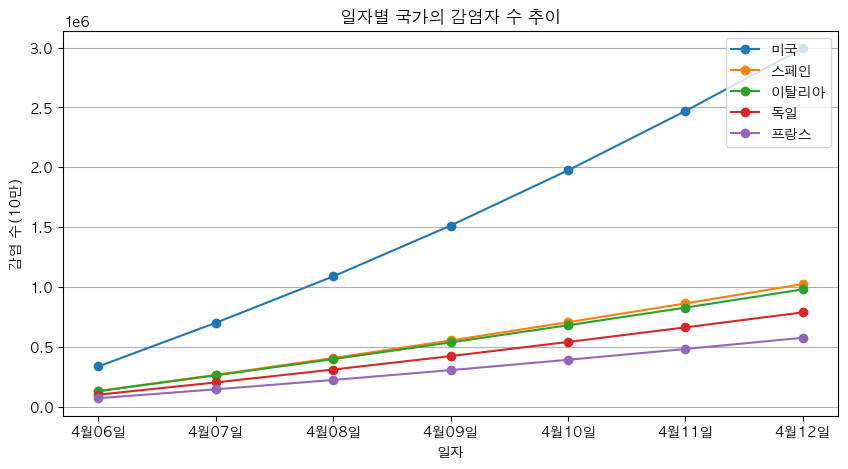

In [69]:
# 꺽은 선 그래프

df.plot(figsize = (10, 5), legend = True, marker = 'o')

plt.grid(axis = 'y')
plt.legend(loc = 'upper right')
plt.title('일자별 국가의 감염자 수 추이')
plt.xlabel('일자')
plt.ylabel('감염 수(10만)')

## 산점도 그래프

In [70]:
# 데이터 로드
df = pd.read_csv('../data/kbo.csv', encoding = 'cp949', index_col = 0)
df

,순위,선수명,팀명,AVG,HR,R,RBI
1,1,최형우,삼성,0.376,31,99,144
2,2,김태균,한화,0.365,23,94,136
3,3,이용규,한화,0.352,3,98,41
4,4,김주찬,기아,0.346,23,97,101
5,5,박용택,엘지,0.346,11,84,90
6,6,구자욱,삼성,0.343,14,105,77
7,7,박민우,엔씨,0.343,3,84,55
8,8,유한준,케이티,0.336,14,70,64
9,9,황재균,롯데,0.335,27,97,113
10,10,박건우,두산,0.335,20,95,83


Text(0.5, 1.0, '산점도 그래프')

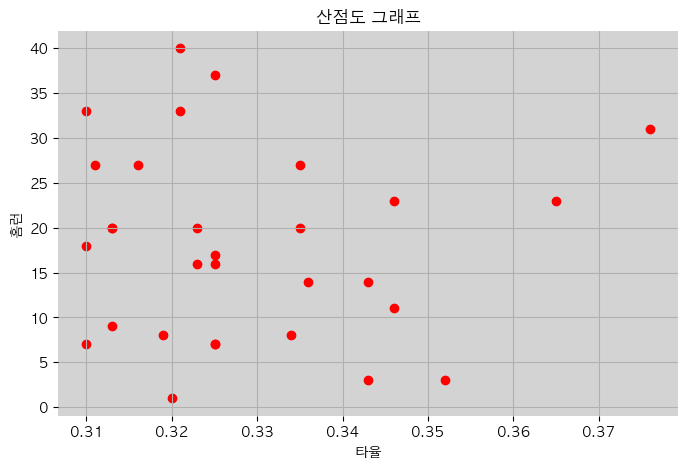

In [95]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.scatter(x = df['AVG'], y = df['HR'], color = 'red')

# ax의 배경 색 설정(밝은 회색)
ax.set_facecolor('#d3d3d3')

# ax의 테두리 없애기
for spine in ax.spines.values():
    spine.set_visible(False)

# 격자설정. 산점도 뒤에 위치하도록
ax.grid(True, zorder = 0)

ax.set_xlabel('타율')
ax.set_ylabel('홈런')
plt.title('산점도 그래프')


## 막대 그래프

In [135]:
df = pd.read_csv('../data/final_exam.csv', encoding = 'cp949')
df.set_index('names', inplace = True)
df.drop(columns = 'gender', inplace = True)
data = df['korean']

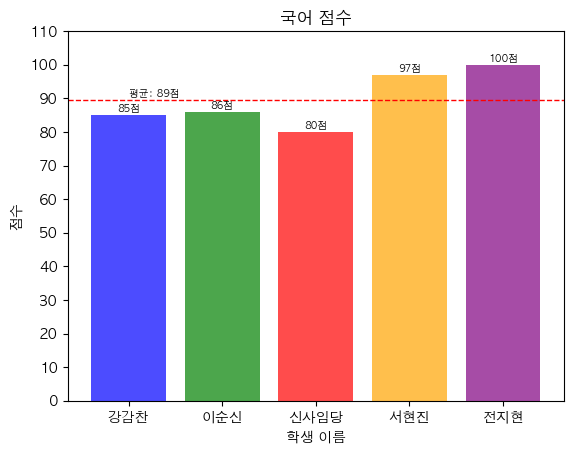

In [188]:
colors = ['blue', 'green', 'red', 'orange', 'purple']

ax = data.plot(kind='bar',
          rot = 0,
          color = colors,
          alpha = 0.7,
          width = 0.8
        )

# 그래프 위에 점수 그리기
for i, v in enumerate(data):
    ax.text(x = i, 
            y = v + 1, 
            s = f"{v}점", 
            horizontalalignment = 'center', 
            fontsize = 7)

# 평균값 수평선으로 그리기
mean = data.mean()

ax.axhline(y = mean, 
          color = 'r', 
          linewidth = 1,
          linestyle = 'dashed')

ax.text(x = 0, 
        y = mean + 1, 
        s = f"평균: {int(mean)}점",
        fontsize = 7)

ax.set_title('국어 점수')
ax.set_xlabel('학생 이름')
ax.set_ylabel('점수')
ax.set_yticks(range(0, 111, 10))

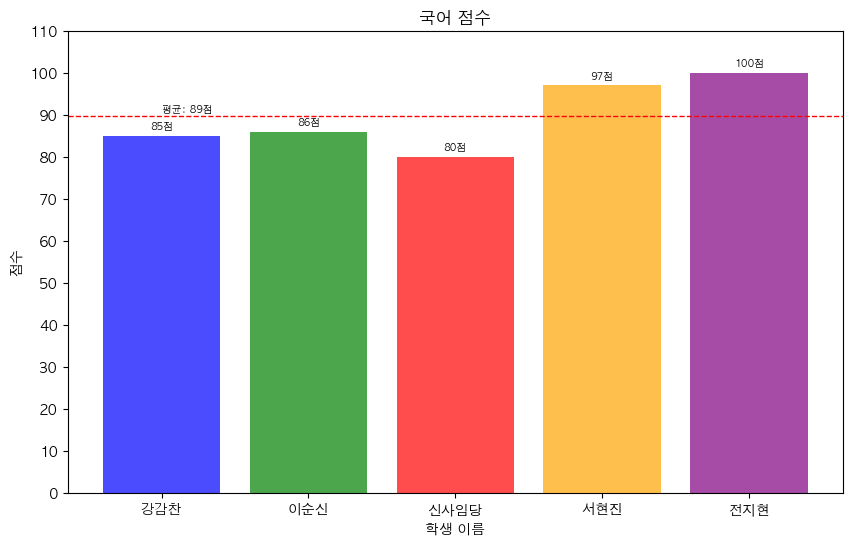

In [189]:
# matplotlib으로 다시

# 막대 색상 지정
colors = ['blue', 'green', 'red', 'orange', 'purple']

# 막대그래프 생성
plt.figure(figsize=(10, 6))
bars = plt.bar(data.index, 
               data, 
               color=colors, 
               alpha=0.7, 
               width=0.8)

# 막대 위에 점수 그리기
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval + 1, 
             f'{int(yval)}점', 
             ha='center', 
             va='bottom', 
             fontsize=7)

# 평균값 수평선과 평균값 텍스트 추가
mean =data.mean()
plt.axhline(y=mean, 
            color='r', 
            linewidth=1, 
            linestyle='dashed')
plt.text(0, 
         mean + 1, 
         f'평균: {int(mean)}점', 
         fontsize=7)

# 그래프 설정
plt.title('국어 점수')
plt.xlabel('학생 이름')
plt.ylabel('점수')
plt.yticks(range(0, 111, 10))
plt.xticks(rotation=0)

plt.show()
